<h1>Kapitel 4 - Kontinuerliga fördelningar</h1>
Vi kommer här gå igenom några av de fördelningar som vi pratat om under föreläsningen, och hur vi kan implementera och räkna på dem i Python med hjälp av paketet SciPy.<br>
Stora delar av det här kommer ni känna igen från förra notebooken 'Kapitel 3. Diskreta fördelningar'.

In [1]:
# Importera nödvändiga paket
import numpy as np
import matplotlib.pyplot as plt

<h3>Generella funktioner i scipy.stats</h3>
Alla fördelningar i SciPy har en rad funktioner kopplade till sig, där vi kan beräkna och ta fram i stort sett alla parametrar vi kan tänkas behöva när vi arbetar med statistik och fördelningar.<br>
Några av de vanligast använda funktionerna är:
<ul>
<li>rvs() - random variates - Den här funktionen ger en NumPy-array med slumpmässiga värden från den givna fördelningen.</li>
<li>pdf() - probability density function - Den här funktionen beräknar täthetsfunktionen i en given punkt.</li>
<li>cdf() - cumulative distribution function - Den här funktionen beräknar den kumulativa sannolikheten i en given punkt P(X <= x) = F(x).</li>
<li>stats() - Den här funktionen beräknar medelvärde, varians, skevhet, samt kurtosis (ej del av kursens innehåll).</li>
<li>interval() - Den här funktionen beräknar ett konfidensintervall, kommer mest användas med normal- och t-fördelningen.</li>
</ul>

<h5>Exponentialfördelningen</h5>
Först beskriver Lantz exponentialfördelningen. Den förekommer i många sammanhang där tid eller avstånd mellan slumpmässiga händelser förekommer, t.ex.:
<ul>
    <li>Tiden tills någon råkar ut för sin nästa bilolycka</li>
    <li>Tiden tills någon får sitt nästa telefonsamtal</li>
    <li>Avståndet mellan mutationer på en DNA-sträng</li>
</ul>
Exponentialfördelningen finns i SciPy som 'expon'. Dokumentationen går att läsa <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html>här</a>.

In [2]:
from scipy.stats import expon # Importera exponentialfördelningen från SciPy

<h5>Exempel 4-2</h5>
En viss maskin påstås ha en så hög driftsäkerhet att den endast måste repareras i genomsnitt 0.5 gånger per år. Anta att detta är sant.
<ol>
    <li>Hur sannolikt är det att tiden mellan två på varandra följande reparationer är längre än 1.5 år?</li>
    <li>Hur sannolikt är det att denna tid är kortare än 5 år?</li>
</ol>
    

Låt X vara en slumpvariabel som betecknar tiden i år mellan varje reparation. Om den repareras i snitt en gång vartannat år blir då väntevärdet E(X) = 2. Vi kan alltså beskriva vår exponentialfördelning med väntevärdesparametern $\mu$ = 2. I SciPy är täthetsfunktionen definierad som f(x) = exp(-x), för att parametrisera den som Lantz gör sätter vi helt enkelt parametern 'scale' till vårt väntevärde $\mu$.

In [3]:
mu = 2 # Sätt mu till väntevärdet E(X) = 2

Uppgift 1. Här behöver vi beräkna sannolikheten för P(X > 1.5), vilket enligt komplementregeln är samma sak som 1 - P(X$\leqslant$1.5), vilket vi i sin tur kan beräkna med kumulativa fördelningsfunktionen enligt: 1 - F(1.5)

In [4]:
result = 1 - expon.cdf(x=1.5, scale=mu) # Beräkna P(X > 1.5) genom 1 - P(X <= 1.5)

print(f'P(X > 1.5): {result}') # Printa resultat

P(X > 1.5): 0.4723665527410147


Uppgift 2. Här får vi sannolikheten direkt ur kumulativa fördelningsfunktionen för P(X<5) = F(5)

In [5]:
result = expon.cdf(x=5, scale=mu) # Beräkna P(X < 5) genom F(5)

print(f'P(X <= 5): {result}') # Printa resultat

P(X <= 5): 0.9179150013761012


<h3>Normalfördelningen</h3>
Normalfördelningen i SciPy är parametriserad utifrån standardnormalfördelningen. Vi kan utifrån den här "flytta" på normalfördelningen med parametrarna 'loc' och 'scale', där loc är medelvärdet $\mu$, och scale är standardavvikelsen $\sigma$.

In [6]:
from scipy.stats import norm # Importera normalfördelningen från SciPy

Om parametrarna 'loc' och 'scale' känns lite konstiga mot vad vi är vana vid, så kan vi se vad de faktiskt betyder. 'loc' står för location, och bestämmer helt enkelt var på x-axeln vår normalfördelning är centrerad. 'scale' är vilken skala den har, eller om man så vill, hur bred vår fördelning är, och därmed ett mått på spridningen. Vi testar att plotta en normalfördelad variabel med $\mu$ = 6 och $\sigma$ = 2.

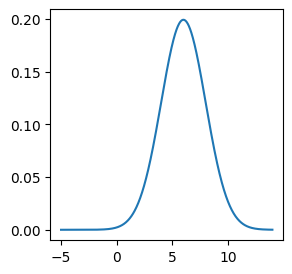

In [7]:
x = np.linspace(-5,14,1000) # Skapa en x-variabel x1 mellan -5-14 med 1000 värden.
y = norm.pdf(x=x, loc=6, scale=2) # Beräkna värdet för y genom normalfördelningen (mu = 6, sigma = 2)

fig, ax = plt.subplots() # Skapa en plot med matplotlib
fig.set_figheight(3) # Sätt figurhöjd
fig.set_figwidth(3) # Sätt figurbredd

ax.plot(x,y) # Plotta x vs y
plt.show() # Visa plotten

Om vi nu tar och jämför vår normalfördelade variabel med standardnormalfördelningen:

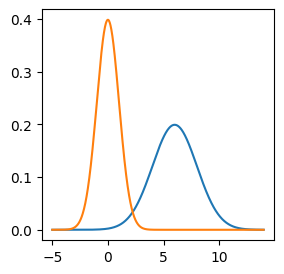

In [8]:
x = np.linspace(-5,14,1000) # Skapa en x-variabel mellan -5-14 med 1000 värden.
y1 = norm.pdf(x=x, loc=6, scale=2)
y2 = norm.pdf(x=x)

fig, ax = plt.subplots() # Skapa en plot med matplotlib
fig.set_figheight(3) # Sätt figurhöjd
fig.set_figwidth(3) # Sätt figurbredd

ax.plot(x,(y1)) # Plotta x vs y1
ax.plot(x,(y2)) # Plotta x vs y2
plt.show() # Visa plotten

Här ser vi att vår omskalning av normalfördelningen med parametrarna loc = 6 och scale = 2 har flyttat centrum på fördelningen till loc (location) = 6. Den har också breddat fördelningen från scale = 1 (default) till scale = 2.

<h5>Exempel 4-4</h5>
Ett projekt består av tre aktiviteter, A, B och C, där B påbörjas så snart A är avslutad och där C påbörjas så snart B är avslutad. Tidsåtgången, uttryckt i månader, för dessa aktiviteter är normalfördelade slumpvariabler: XA~(7,3), XB~(6,4), XC~(9,5). Vad är väntevärdet och standardavvikelsen för den totala projekttiden? Vi räknar ut respektive medelvärde med mean(), och sedan varianser med var().<br>

OBS! Kom ihåg att standardavvikelser inte kan adderas. Vi räknar alltså först ut variansen (varianser kan adderas), och räknar utifrån den ut standardavvikelsen.

In [9]:
mean = norm.mean(7,3)+norm.mean(6,4)+norm.mean(9,5) # Beräkna medelvärdet för de tre normalfördelningarnas medelvärden.
variance = norm.var(7,3)+norm.var(6,4)+norm.var(9,5) # Beräkna variansen för de tre normafördleningarnas varianser
stdev = np.sqrt(variance) # Beräkna standardavvikelsen ur variansen.

stdev_failed = norm.std(7,3)+norm.std(6,4)+norm.std(9,5) # Beräkna standardavvikelsen på "fel sätt"


print('Mean: ' +str(mean)) # Printa medelvärde
print('StDev: ' +str(stdev)) # Printa standardavvikelse
print('StDev is not equal to: ' +str(stdev_failed)) # Printa felaktig standardavvikelse

Mean: 22.0
StDev: 7.0710678118654755
StDev is not equal to: 12.0


<h5>Exempel 4-5</h5>

Antag att man är intresserad av P(-1<Z<1.5). Hur kan man använda standardnormalfördelningen för att ta reda på denna sannolikhet?
Här blir det tydligt att det här går att lösa väldigt mycket enklare än det gör i exemplet, nu när vi har tillgång till den kumulativa fördelningsfunktionen F(x). Vi vet att för kumulativa fördelningsfunktionen F(x) gäller P(X<=x). Vi kan då konstatera att sannolikheten att Z antar värden mellan -1 och 1.5 ges av P(X<=1.5) - P(X<=-1).<br>
Eftersom normalfördelningen i SciPy är parametriserad som standardnormalfördelningen Z, behöver vi inte lägga in varken $\mu$ eller $\sigma$, utan kan helt enkelt bara evaluera cdf() i 1.5. och -1.0.

In [10]:
result = norm.cdf(1.5) - norm.cdf(-1.0) # Beräkna sannolikhet för P(-1 < Z < 1.5)

print(f'Result: {result}') # Printa resultat

Result: 0.7745375447996848


<h5>Exempel 4-5 (ja, en gång till)</h5>
Längden på kvinnor (och även män) i ett visst samhäller är som regel en approximativt normalfördelad slumpvariabel. Antag att detta gäller svenska kvinnor och att de i genomsnitt är 167 cm långa med standardavvikelsen 6 cm.
<ol>
    <li>Hur stor andel av kvinnorna är mer än 10 cm längre än genomsnittet?</li>
    <li>Hur stor andel av kvinnorna är mellan 163 och 170 cm?</li>
</ol>

Uppgift 1. Här behöver vi transformera vår normalfördelade slumpvariabel till standardnormalfördelningen Z. Det gör vi i SciPy genom att sätta värden på $\mu$ och $\sigma$. Sedan kan vi beräkna sannolikheten för att kvinnorna skall vara mer än 10 cm längre än genomsnittet genom att utvärdera cdf() för P(X<=177). Eftersom vi vill ha sannolikheten P(X>177) tar vi enligt komplementregeln: 1 - P(X<=177).

In [11]:
loc = 167 # Sätt medelvärdet 'loc' till 167
scale = 6 # Sätt standardavvikelsen 'scale' till 6

In [12]:
result = 1 - norm.cdf(loc=loc, scale=scale, x=177) # Beräkna 1 - P(X <= 177)

print(f'Result: {result}') # Printa resultat

Result: 0.047790352272814696


Uppgift 2. Här gör vi på samma sätt, fast vi använder oss av lärdomen från Exempel 4-4. Vi beräknar alltså P(X<=170) - P(X<=163).

In [13]:
result = norm.cdf(loc=loc, scale=scale, x=170) - norm.cdf(loc=loc, scale=scale, x=163) # Beräkna P(X <= 170) - P(X <= 163)

print(f'Result: {result}') # Printa resultat

Result: 0.4389699237270902
